Engy-5310: Computational Continuum Transport Phenomena Spring 2021 UMass Lowell; Prof. V. F. de Almeida **19Feb21**

# Howmework 08 (05Mar21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (40 pts)](#a1) Poisson/Dirichlet 1-D model problem.
 - [1.1)](#a11)(10 pts) Solve problem analytically and obtain the exact energy.
 - [1.2)](#a12)(10 pts) State the Galerkin variational problem and explain the Dirichlet energy.
 - [1.3)](#a13)(20 pts) Solve problem with the Galerkin FEM and MOOSE framework.
* [Assignment 2 (45 pts)](#a2) Poisson/Dirichlet 1-D model problem revisited.
 - [2.1)](#a21)(45 pts) Re-solve problem with the Galerkin FEM and MOOSE framework.
* [Assignment 3 (5 pts)](#a3) 
---

### <span style="color:blue">Given the Poisson/Dirichlet 1-D model problem:</span>
<br>
<span style="color:blue">
    
Find $u:[a,b]\in\Reals\rightarrow\Reals$ for $D > 0$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)'(x) + S &= 0 \quad \forall \quad x\in [a,b], \\
 u(a) &= A, \\
 u(b) &= B,
\end{align*}
   
where the parameters: 
 + diffusion coefficient, $D$, 
 + source, $S$, 
 + entry concentration, $A$, and 
 + exit concentration $B$,

are given below, and the associated Dirichlet energy is defined as
    
\begin{align*}
 \Phi[u] := \int\limits_a^b \,\frac{1}{2}\bigl(q(x)\bigr)^2 - D\,S\,u(x) \,dx,
\end{align*}
    
where the flux is denoted $q:=-D\,u'$; address the sub-assignments below.

</span>

## <span style="color:blue">[Assignment 1 (40 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(10 pts) Solve the problem analytically and obtain the exact energy.
<a id="a11"></a>

\begin{align*}
&Du'' + S = 0 \\
&u'' = \frac{-S}{D} \\
\int &u'' = \int \frac{-S}{D} \\
\int &u' = \int \frac{-S}{D}x, + c_1 \\
&u(x) = \frac{-S}{2D}x^2 + c_1 x + c_2 \\
\end{align*}

Putting the equation in dimensionless form gives the following:
\begin{align*}
&\hat{x} = \frac{x - a}{b - a}\\
&u(\hat{x}) = \frac{-S}{2D}\hat{x}^2 + c_1 \hat{x} + c_2\\
&u(a) = A\\
&u(b) = B\\
&u(a) = \frac{-S}{2D}(\frac{a - a}{b - a})^2 + c_1 (\frac{a - a}{b - a})  + c_2 = c_2 = A\\
&u(b) = \frac{-S}{2D}(\frac{b - a}{b - a})^2 + c_1 (\frac{b - a}{b - a}) + A = \frac{-S}{2D} + c_1 + A = B\\
&c_1 = B - A + \frac{S}{2D}
\end{align*}

Thus our dimensionless analytical solution is:
\begin{align*}
&u(\hat{x}) = \frac{-S}{2D}\hat{x}^2 + (B - A + \frac{S}{2D}) \hat{x} + A
\end{align*}

Analytic energy can then be solved for as follows:
\begin{align*}
\int\limits_0^1 \frac{1}{2} (q(\hat{x}))^2 - DSu(\hat{x})dx
\end{align*}


### <span style="color:blue">[1.2)](#toa)(10 pts) State the Galerkin variational problem and explain what the Dirichlet energy means.
</span><a id="a12"></a>

\begin{align*}
 \int\limits_a^b -D\, u'(x)\,v'(x)\,dx + \int\limits_a^b S\,v(x)\,dx &= 0 \quad \forall \quad v \in H^1_0\!\bigl([a,b]\bigr), 
\end{align*}

### <span style="color:blue">[1.3)](#toa)(20 pts) Using the Galerkin FEM and the MOOSE framework solve the diffusion problem using quadratic Lagrange polynomial basis functions for the values:</span>
<br>
<span style="color:blue">
    
|       Description          | Parameter |      Value         |            Units               |
|----------------------------|-----------|--------------------|--------------------------------|
| Entry point $x$ coordinate |   $a$     |-1.6                | $\text{m}$                    |
| Exit point $x$ coordinate  |   $b$     | 2.3                | $\text{m}$                    |
| Entry concentration        |   $A$     |$3.1$               | $\frac{\text{$\mu$g}}{\text{cc}}$   |
| Exit concentration         |   $B$     |$2.7\times 10^1$    | $\frac{\text{$\mu$g}}{\text{cc}}$   |
| Diffusion coefficient      |   $D$     |$5\times 10^{-5}$   | $\frac{\text{m}^2}{\text{s}}$ |
| Source                     |   $S$     |$-1.13$              | $\frac{\text{$\mu$g}}{\text{cc h}}$ |
    
</span>    

### <span style="color:blue"> Use 1 finite element and produce the results below.

</span><a id="a13"></a>

In [28]:
!pip install matplotlib
!pip install numpy
!pip install pandas
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'plt'

In [71]:
'''Show FEM Solution and Flux'''
!./engy5310p1-opt -i input.i
energy = pd.read_csv('output.csv')
u = pd.read_csv('output_u_0002.csv')
flux = pd.read_csv('output_x-data_0002.csv')






Framework Information:
MOOSE Version:           git commit d2b4648b2d on 2021-02-18
LibMesh Version:         
PETSc Version:           3.14.2
SLEPc Version:           3.14.0
Current Time:            Mon Apr  5 02:14:28 2021
Executable Timestamp:    Sun Apr  4 19:23:19 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   
    Total:                 7
    Local:                 7
  Elems:                   
    Total:                 3
    Local:                 3
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                7
  Num Local DOFs:          7
  Variables:               "u" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Auxiliary System:
  Num DOFs:                6
  Num Local DOFs:          6
  Variables:               "diffFluxU_x" 
  Finite Eleme

    diffFluxU_x          id          u           x  y  z
0   -124.347808    0.000000   3.100000 -160.000000  0  0
1    -98.137755   20.526316   1.977382 -139.473684  0  0
2    -71.927702   41.052632   1.119266 -118.947368  0  0
3    -45.717650   61.578947   0.525651  -98.421053  0  0
4    -19.507597   82.105263   0.196537  -77.894737  0  0
5      6.702455  102.631579   0.131925  -57.368421  0  0
6     32.912508  123.157895   0.331814  -36.842105  0  0
7     59.122561  143.684211   0.796205  -16.315789  0  0
8     85.332613  164.210526   1.525097    4.210526  0  0
9    111.542666  184.736842   2.518490   24.736842  0  0
10   137.752719  205.263158   3.776385   45.263158  0  0
11   163.962771  225.789474   5.298781   65.789474  0  0
12   190.172824  246.315789   7.085679   86.315789  0  0
13   216.382877  266.842105   9.137078  106.842105  0  0
14   242.592929  287.368421  11.452978  127.368421  0  0
15   268.802982  307.894737  14.033380  147.894737  0  0
16   295.013034  328.421053  16

<Figure size 720x432 with 0 Axes>

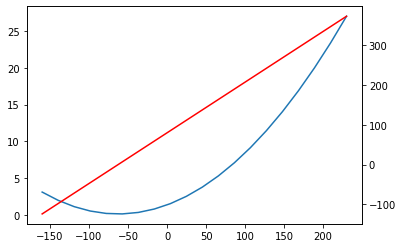

<Figure size 720x432 with 0 Axes>

In [72]:
plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots()
plt.figure(figsize=(10,6))
ax1.plot(u[['x']], u[['u']])
ax2 = ax1.twinx()
ax2.plot(flux[['x']], flux[['diffFluxU_x']], color='red')
print(flux)


-0.00031388888888888883
23.89968611111111
3.1
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[array([ 3.1       ,  4.35787909,  5.61575991,  6.87364247,  8.13152678,
        9.38941282, 10.6473006 , 11.90519012, 13.16308138, 14.42097438,
       15.67886911, 16.93676559, 18.1946638 , 19.45256376, 20.71046545,
       21.96836888, 23.22627405, 24.48418096, 25.74208961, 27.        ])]
[array([ 3.1       ,  4.35787909,  5.61575991,  6.87364247,  8.13152678,
        9.38941282, 10.6473006 , 11.90519012, 13.16308138, 14.42097438,
       15.67886911, 16.93676559, 18.1946638 , 19.45256376, 20.71046545,
       21.96836888, 23.22627405, 24.48418096, 25.74208961, 27.        ])]


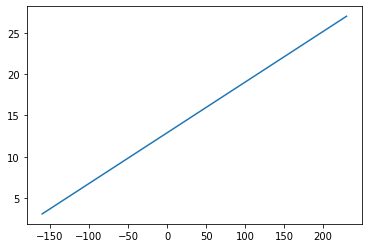

In [69]:
'''Error Compared to Exact Dimensionless Solution'''
S = -1.13
D = 1800
a = -160
A = 3.1
b = 230
B = 27
C1 = B - A + (S/(2*D))
C2 = A

print(S/(2*D))
print(C1)
print(C2)
analytical_soln = []
z = 0
u_x = u[['x']].to_numpy()
u_u = u[['u']].to_numpy()
u_x = np.transpose(u_x)
u_u = np.transpose(u_u)

for i in u_x:
    x_hat = (i - a)/(b - a)
    print(x_hat)
    analytical_soln.append(((-1 * S)/(2 * D) * (x_hat)**2 + C1 * x_hat + C2))
    print(analytical_soln)
    z += 1

z = 0
error = []
print(analytical_soln)
for i in u_u:
    error.append(i - analytical_soln[z])
    z += 1
#print(error)
u_x = np.transpose(u_x)
analytical_soln = np.transpose(analytical_soln)
plt.plot(u_x, analytical_soln)

    



In [60]:
'''Flux Error Compared to Exact Dimensionless Solution'''


'Flux Error Compared to Exact Dimensionless Solution'

In [61]:
'''Relative Energy Error'''


'Relative Energy Error'

## <span style="color:blue">[Assignment 2 (45 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(45 pts) Using the Galerkin FEM and the MOOSE framework solve the diffusion problem in 1.3) using quadratic Lagrange polynomial basis functions and compute the minimum number of elements to reduct the relative energy error to less than 1%.</span>
</span><a id="a21"></a>

In [ ]:
'''Show FEM Solution and Flux'''


In [ ]:
'''Error Compared to Exact Dimensionless Solution'''


In [ ]:
'''Flux Error Compared to Exact Dimensionless Solution'''


In [17]:
'''Relative Energy Error'''


FEM energy   [] = 1.474192e-01
Exact energy [] = 1.472750e-01
Energy rel. error [%] =  9.791e-02


## <span style="color:blue">[Assignment 3 (5 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

**Answer:**